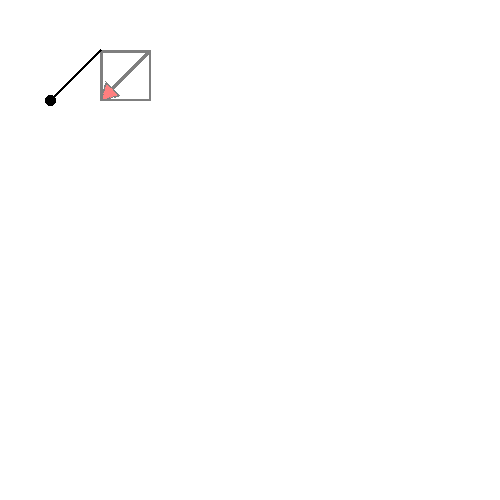

In [37]:
# draw arrowblock at the correct angle given two mm.image.Points


from PIL import Image, ImageDraw 



src = mm.image.Point(50, 50)
dst = mm.image.Point(100, 100)
    
# src = mm.image.Point(50, 100)
# dst = mm.image.Point(100, 50)

src = mm.image.Point(100, 100)
dst = mm.image.Point(50, 50)

src = mm.image.Point(100, 50)
dst = mm.image.Point(50, 100)

a = mm.image.ArrowBlock(
    src=src,
    dst=dst,
    head_width=20, 
    tail_len=75, 
    tail_width=15, 
    fill="red")

bg = Image.new("RGBA", (500, 500), color="white")
c = ImageDraw.Draw(bg)
c.ellipse([(dst.x - 5, dst.y - 5), (dst.x + 5, dst.y + 5)], fill="black")
c.line([(src.x, src.y),(dst.x, dst.y)], fill="black", width=2)



coords = (src.x, src.y)
bg = a.overlay(bg, coords, 128)
# bg.paste(a.img, coords)
bg